# Notebook 5: Other python resources

### by Justin B. Kinney

Today's tutorial will focus on useful python resources, including **pyfasta, biopython, seaborn, scikit-learn, and scipy**

In [1]:
# Always put this first
%matplotlib inline
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

To run today's code, you will need to install three packages: pyfasta, biopython, and seaborn. Do this at the shell (not python) command line:
```
$ conda install seaborn
$ conda install biopython
$ conda install pyfasta
```

# Simple hacks for working with DNA and RNA sequences

In [2]:
# Here are some simple functions work working with DNA
import string
def reverse_complement(seq):
    complement = string.maketrans('ATCGN', 'TAGCN')
    return str(seq).upper().translate(complement)[::-1]

def transcribe(seq):
    return str(seq).replace('T','U')

In [3]:
seq = 'ACCCTCCATTACCCTGCCTCCACTCGTTACCCTGTCCCATTCAACCATACCACTCCGAAC'

print 'DNA:      ', seq
print 'DNA (rc): ', reverse_complement(seq)
print 'RNA:      ', transcribe(seq)

DNA:       ACCCTCCATTACCCTGCCTCCACTCGTTACCCTGTCCCATTCAACCATACCACTCCGAAC
DNA (rc):  GTTCGGAGTGGTATGGTTGAATGGGACAGGGTAACGAGTGGAGGCAGGGTAATGGAGGGT
RNA:       ACCCUCCAUUACCCUGCCUCCACUCGUUACCCUGUCCCAUUCAACCAUACCACUCCGAAC


## pyfasta

pyfasta (https://pypi.python.org/pypi/pyfasta) provides a simple way to read sequences out of very large DNA sequence files in FASTA format. pyfasta can be installed with

```
$ conda install pyfasta
```

In [4]:
# # Clean names in fasta file
# import re
# chr_pattern = re.compile('>.*chromosome=([XIV]+).*')
# mito_pattern = re.compile('>.*mitochondrion.*')

# f = open('s288c.fa','r')
# g = open('s288c_simple.fa','w')
# for line in f.xreadlines():
#     chr_match = re.match(pattern,line) 
#     mito_match = re.match(mito_pattern,line)
#     if chr_match:
#         line = '>chr%s\n'%chr_match.group(1)
#     elif mito_match:
#         line = '>mitochondrion\n'
#     g.write(line)

In [5]:
!head 's288c_simple.fa'

>chrI
CCACACCACACCCACACACCCACACACCACACCACACACCACACCACACCCACACACACA
CATCCTAACACTACCCTAACACAGCCCTAATCTAACCCTGGCCAACCTGTCTCTCAACTT
ACCCTCCATTACCCTGCCTCCACTCGTTACCCTGTCCCATTCAACCATACCACTCCGAAC
CACCATCCATCCCTCTACTTACTACCACTCACCCACCGTTACCCTCCAATTACCCATATC
CAACCCACTGCCACTTACCCTACCATTACCCTACCATCCACCATGACCTACTCACCATAC
TGTTCTTCTACCCACCATATTGAAACGCTAACAAATGATCGTAAATAACACACACGTGCT
TACCCTACCACTTTATACCACCACCACATGCCATACTCACCCTCACTTGTATACTGATTT
TACGTACGCACACGGATGCTACAGTATATACCATCTCAAACTTACCCTACTCTCAGATTC
CACTTCACTCCATGGCCCATCTCTCACTGAATCAGTACCAAATGCACTCACATCATTATG


In [6]:
# Read a fasta file in a simple, pythonic manner
import pyfasta
my_fasta = pyfasta.Fasta('s288c_simple.fa')

# We interface with the FASTA file like we interface with dictionaries
print 'Keys:', my_fasta.keys()
print 'Slice:', my_fasta['chrI'][120:180]


Keys: ['chrV', 'chrII', 'chrVI', 'chrIV', 'chrXIV', 'chrXVI', 'chrXI', 'chrXIII', 'chrXV', 'chrIX', 'chrXII', 'mitochondrion', 'chrIII', 'chrX', 'chrVII', 'chrI', 'chrVIII']
Slice: ACCCTCCATTACCCTGCCTCCACTCGTTACCCTGTCCCATTCAACCATACCACTCCGAAC


## Biopython

Biopython provides routines for dealing with DNA sequence and performing other bioinformatics computations. The official website is http://biopython.org/wiki/Biopython. Biopython can be insalled by doing this at the command line:

```
$ conda install Biopython
```
Personally, I find Biopython to be overly complicated. I actually only use it when translating DNA or RNA to protein.

In [7]:
# Create a DNA sequence
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna

# Create a DNA sequence
my_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG", generic_dna)
my_dna_rc = my_dna.reverse_complement()
my_rna = my_dna.transcribe()

print 'DNA:', my_dna
print 'DNA (rc):', my_dna_rc
print 'RNA:', my_rna

DNA: ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
DNA (rc): CTATCGGGCACCCTTTCAGCGGCCCATTACAATGGCCAT
RNA: AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG


In [8]:
# Translate protein
bad_protein = my_rna.translate()
bad_protein

Seq('MAIVMGR*KGAR*', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [9]:
# Translate using a different codon table
good_protein = my_rna.translate(table="Vertebrate Mitochondrial")
good_protein

Seq('MAIVMGRWKGAR*', HasStopCodon(ExtendedIUPACProtein(), '*'))

## Pandas

Pandas is a package for working with columnar data. It comes standard with the anaconda installation of python. Pandas is incredibly useful, but there is a substantial learning curve. If you want to learn more about Pandas, 
here is a useful site: http://pandas.pydata.org/, and
here is a book written by Wes McKinney (the author of pandas): http://shop.oreilly.com/product/0636920023784.do

Let's try the data parsing exercise now with pandas

In [10]:
!open binding_site_db.txt

In [11]:
in_file = 'binding_site_db.txt'
column_indices = [1,11]
column_names = ['name','site']
dtype_dict = {'name':str, 'site':str}
tf_df = pd.read_csv(in_file,sep='\t',comment='#',usecols=column_indices,names=column_names,dtype=dtype_dict)
tf_df.head()

,name,site
0,AccB,NaN
1,AcrR,gcgttagattTACATACATTTGTGAATGTATGTAccatagcacg
2,AcrR,cgtgctatggTACATACATTCACAAATGTATGTAaatctaacgc
3,AcrR,catcggtcaaTTCATTCATTtgacttatac
4,AcrR,gcccccctccGTTGTATGTGcgtgtagtga


In [12]:
# Remove NaNs
ok_indices = [type(site) is str for site in tf_df['site']]
tf_df = tf_df[ok_indices]

# Show df
tf_df.head()

,name,site
1,AcrR,gcgttagattTACATACATTTGTGAATGTATGTAccatagcacg
2,AcrR,cgtgctatggTACATACATTCACAAATGTATGTAaatctaacgc
3,AcrR,catcggtcaaTTCATTCATTtgacttatac
4,AcrR,gcccccctccGTTGTATGTGcgtgtagtga
5,AcrR,atttattaccGTCATTCATTTCTGAATGTCTGTTtacccctatt


In [13]:
# Caplitalize sites
tf_df['site'] = [site.upper() for site in tf_df['site']]

# Comptue site lengths
tf_df['length'] = [len(site) for site in tf_df['site']]

tf_df.head()

,name,site,length
1,AcrR,GCGTTAGATTTACATACATTTGTGAATGTATGTACCATAGCACG,44
2,AcrR,CGTGCTATGGTACATACATTCACAAATGTATGTAAATCTAACGC,44
3,AcrR,CATCGGTCAATTCATTCATTTGACTTATAC,30
4,AcrR,GCCCCCCTCCGTTGTATGTGCGTGTAGTGA,30
5,AcrR,ATTTATTACCGTCATTCATTTCTGAATGTCTGTTTACCCCTATT,44


In [14]:
# Extract rows for TF of interest
df = tf_df[tf_df['name']=='CRP'].copy()

# Only take rows with sites of the right size
length_mode = df['length'].mode()[0]
df = df[df['length']==length_mode]

df.head()

,name,site,length
315,CRP,TTGATGACATAAGCAGGATTTAGCTCACACTTATCGACGGTG,42
316,CRP,CCCGAAACAAAAATGTGATACCAATCACAGAATACAGCTTAT,42
317,CRP,GACTTTCAATATTGGTGATCCATAAAACAATATTGAAAATTT,42
318,CRP,TGTTTTCAATATTGGTGAGGAACTTAACAATATTGAAAGTTG,42
319,CRP,TCCACATTGATTATTTGCACGGCGTCACACTTTGCTATGCCA,42


In [15]:
# Turn this into a function that can process any TF name!
def get_counts_matrix(tf_name):
    
    # Make sure TF is in database
    tf_names = set(tf_df['name'])
    assert tf_name in tf_names, 'Error! No TF named %s in database.'%tf_name
    
    # Extract rows for TF of interest
    df = tf_df[tf_df['name']==tf_name]

    # Only take rows with sites of the right size
    length_mode = df['length'].mode()[0]
    df = df[df['length']==length_mode]

    # Fill counts matrix
    counts_matrix = np.zeros([length_mode,4])
    bases = 'ACGT'
    for s in df['site']:
        for i in range(length_mode):
            for b, base in enumerate(bases):
                counts_matrix[i,b] += (s[i] == base)
                
    return counts_matrix

# Test function
get_counts_matrix('AraC')

array([[  6.,   8.,   1.,   9.],
       [  4.,   9.,   7.,   4.],
       [  8.,   6.,   5.,   5.],
       [ 10.,   9.,   1.,   4.],
       [ 12.,   1.,   0.,  11.],
       [ 12.,   2.,   3.,   7.],
       [ 10.,   3.,   5.,   6.],
       [  4.,   7.,   5.,   8.],
       [  7.,  11.,   1.,   5.],
       [ 11.,   0.,   4.,   9.],
       [  0.,   5.,   3.,  16.],
       [ 18.,   1.,   5.,   0.],
       [  4.,   2.,  10.,   8.],
       [  2.,  10.,  10.,   2.],
       [  9.,   3.,  11.,   1.],
       [ 12.,   2.,   5.,   5.],
       [  6.,   5.,   1.,  12.],
       [  9.,   0.,   3.,  12.],
       [  5.,   4.,   3.,  12.],
       [  9.,   4.,   1.,  10.],
       [ 10.,   3.,   5.,   6.],
       [  8.,   4.,   1.,  11.],
       [  1.,  14.,   4.,   5.],
       [  2.,   9.,   9.,   4.],
       [  9.,   9.,   1.,   5.],
       [  2.,   2.,   3.,  17.],
       [ 17.,   2.,   4.,   1.],
       [  7.,   5.,   1.,  11.],
       [  5.,   0.,  10.,   9.],
       [  5.,  11.,   5.,   3.],
       [  

# Matplotlib

Matplotlib is the standard plotting utility in python. I use it all the time to make publication quality plots. The main matplotlib page is here: https://matplotlib.org/index.html. A gallery of things you can do is here: https://matplotlib.org/gallery.html

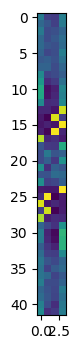

In [24]:
counts_matrix = get_counts_matrix('CRP')
plt.imshow(counts_matrix)

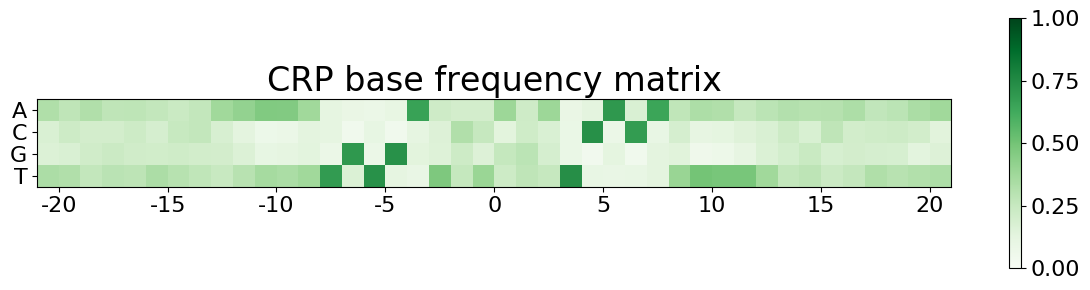

In [25]:
# Compute occurence frequency of each base at each position, not the total counts
num_sites = counts_matrix.sum(axis=1)[0]
freq_matrix = counts_matrix.T/num_sites
L = counts_matrix.shape[0]

# Set plotting parameter
figure_size = [12,3]
label_size = 16
title_size = 24
colormap = plt.get_cmap('Greens')

# Specify figure of proper size
plt.figure(figsize=figure_size)

# Show matrix without any smoothing
plt.imshow(freq_matrix, cmap=colormap)

# Put interpretable letters on y-axis
plt.yticks(range(4),['A','C','G','T'], fontsize=label_size)

# Label positions symmetically
positions = np.arange(L)-(L/2)+1
indices = np.arange(0,L,5)
plt.xticks(indices+.5, positions[indices].astype(int), fontsize=label_size)

# Fix colorbar
plt.clim([0, 1])
cbar = plt.colorbar(ticks=np.linspace(0,1,5))
cbar.ax.tick_params(labelsize=label_size) 

# Draw a title
plt.title('CRP base frequency matrix', fontsize=title_size)

# Fix spacing in plot
plt.tight_layout()

# Save the figure
picture_file = 'crp_matrix.png'
plt.savefig(picture_file)

# Draw the plot
plt.show()

## Seaborn

The seaborn module, described here, https://stanford.edu/~mwaskom/software/seaborn/, provides very convenient plotting functionality. The plotting functions in seaborn do a lot more than those in matplotlib (ontop of which they are built). Seaborn produces matplotlib objects, and all matplotlib functions can be used in conjunction with seaborn.

WARNING: Seaborn messes with the default styles, so once you load it, expect plots produced by matplotlib to look different. This behavior can be controlled with the 'sns.set()' function

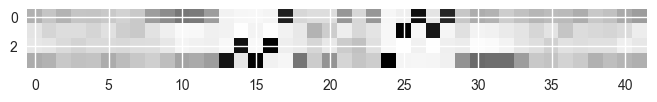

In [26]:
# This is the convention for importing seaborn
import seaborn as sns

#sns.set(style="white", palette="muted", color_codes=True)

counts_mat = get_counts_matrix('CRP')
plt.imshow(counts_mat.T)

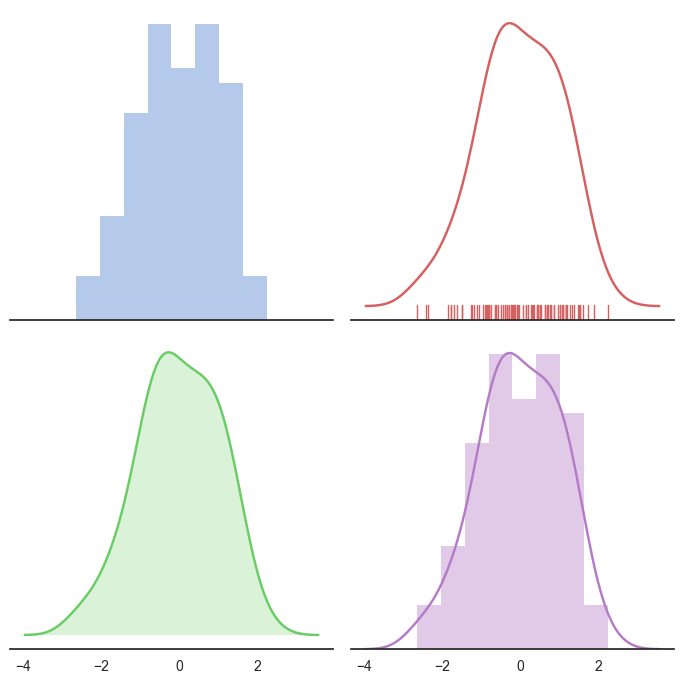

In [27]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = np.random.randn(100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

In [28]:
# Seaborn comes with some standard data sets

# Load dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


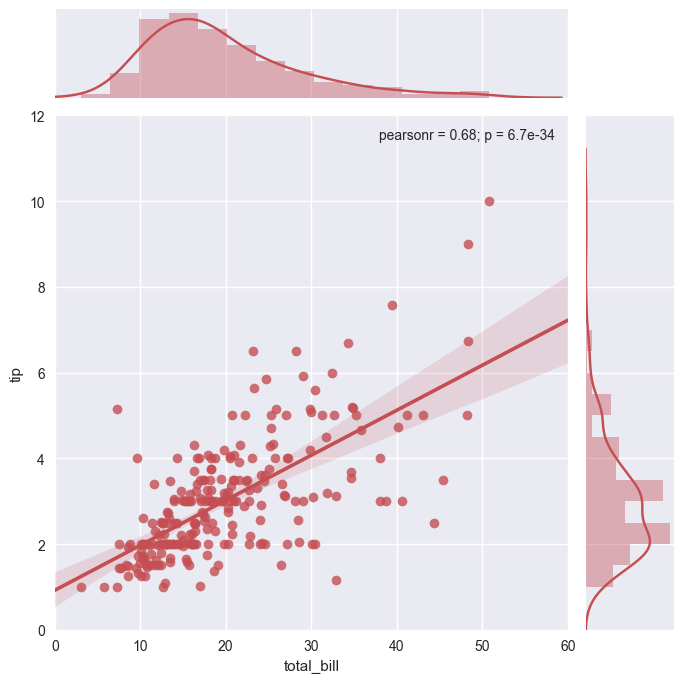

In [29]:
# Joint plot
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)

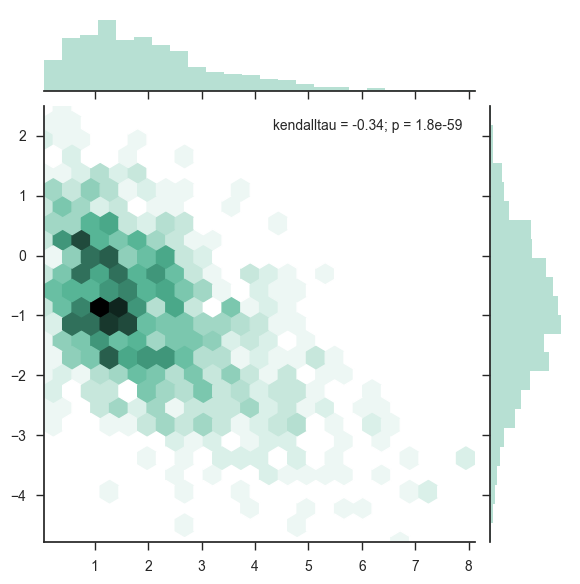

In [30]:
from scipy.stats import kendalltau
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", stat_func=kendalltau, color="#4CB391")

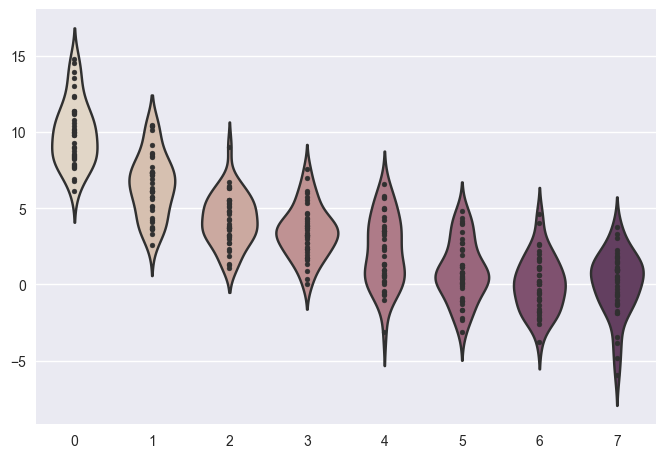

In [31]:
# Violin plot
sns.set()

# Create a random dataset across several variables
rs = np.random.RandomState(0)
n, p = 40, 8
d = rs.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(p, rot=+.5, dark=.3)

# Show each distribution with both violins and points
sns.violinplot(data=d, palette=pal, inner="points")

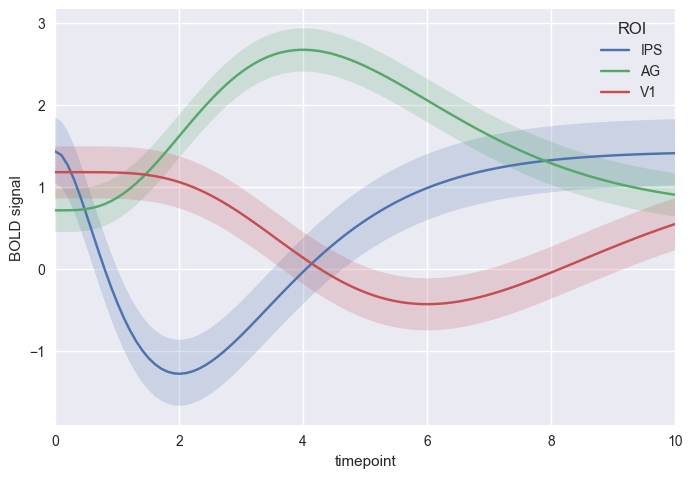

In [32]:
sns.set(style="darkgrid")

# Load the long-form example gammas dataset
gammas = sns.load_dataset("gammas")

# Plot the response with standard error
sns.tsplot(data=gammas, time="timepoint", unit="subject",
           condition="ROI", value="BOLD signal")

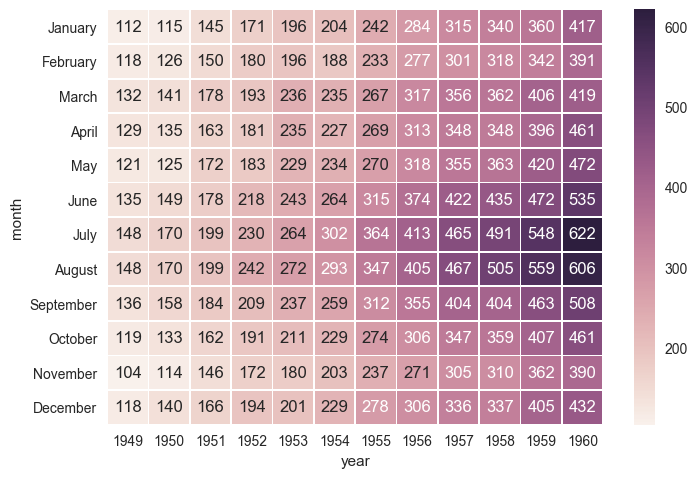

In [33]:
# Heatmap
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5)

## scikit-learn

scikit-learn is the premeir machine learning module for python. The package and documentation can be found here: http://scikit-learn.org/stable/index.html. This module comes pre-installed in the Anaconda distribution.

### Classification of handwritten numbers

In [34]:
"""
================================
Recognizing hand-written digits
================================

An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This example is commented in the
:ref:`tutorial section of the user manual <introduction>`.

"""
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

print digits.keys()


Recognizing hand-written digits

An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This example is commented in the
:ref:`tutorial section of the user manual <introduction>`.


['images', 'data', 'target_names', 'DESCR', 'target']


target =  0


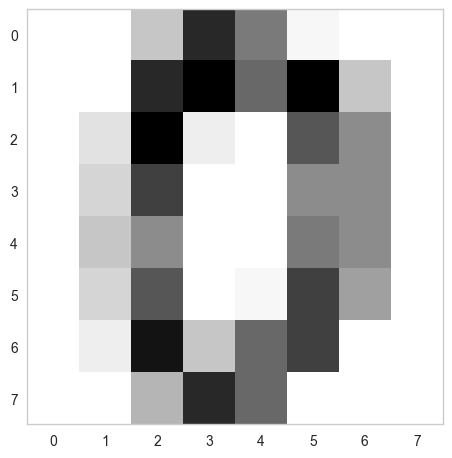

In [35]:
# Print one of the images
sns.set_style("whitegrid", {'axes.grid' : False})
image = digits['images'][0]
target = digits['target'][0]
plt.imshow(digits['images'][0], interpolation='nearest')
print 'target = ', target

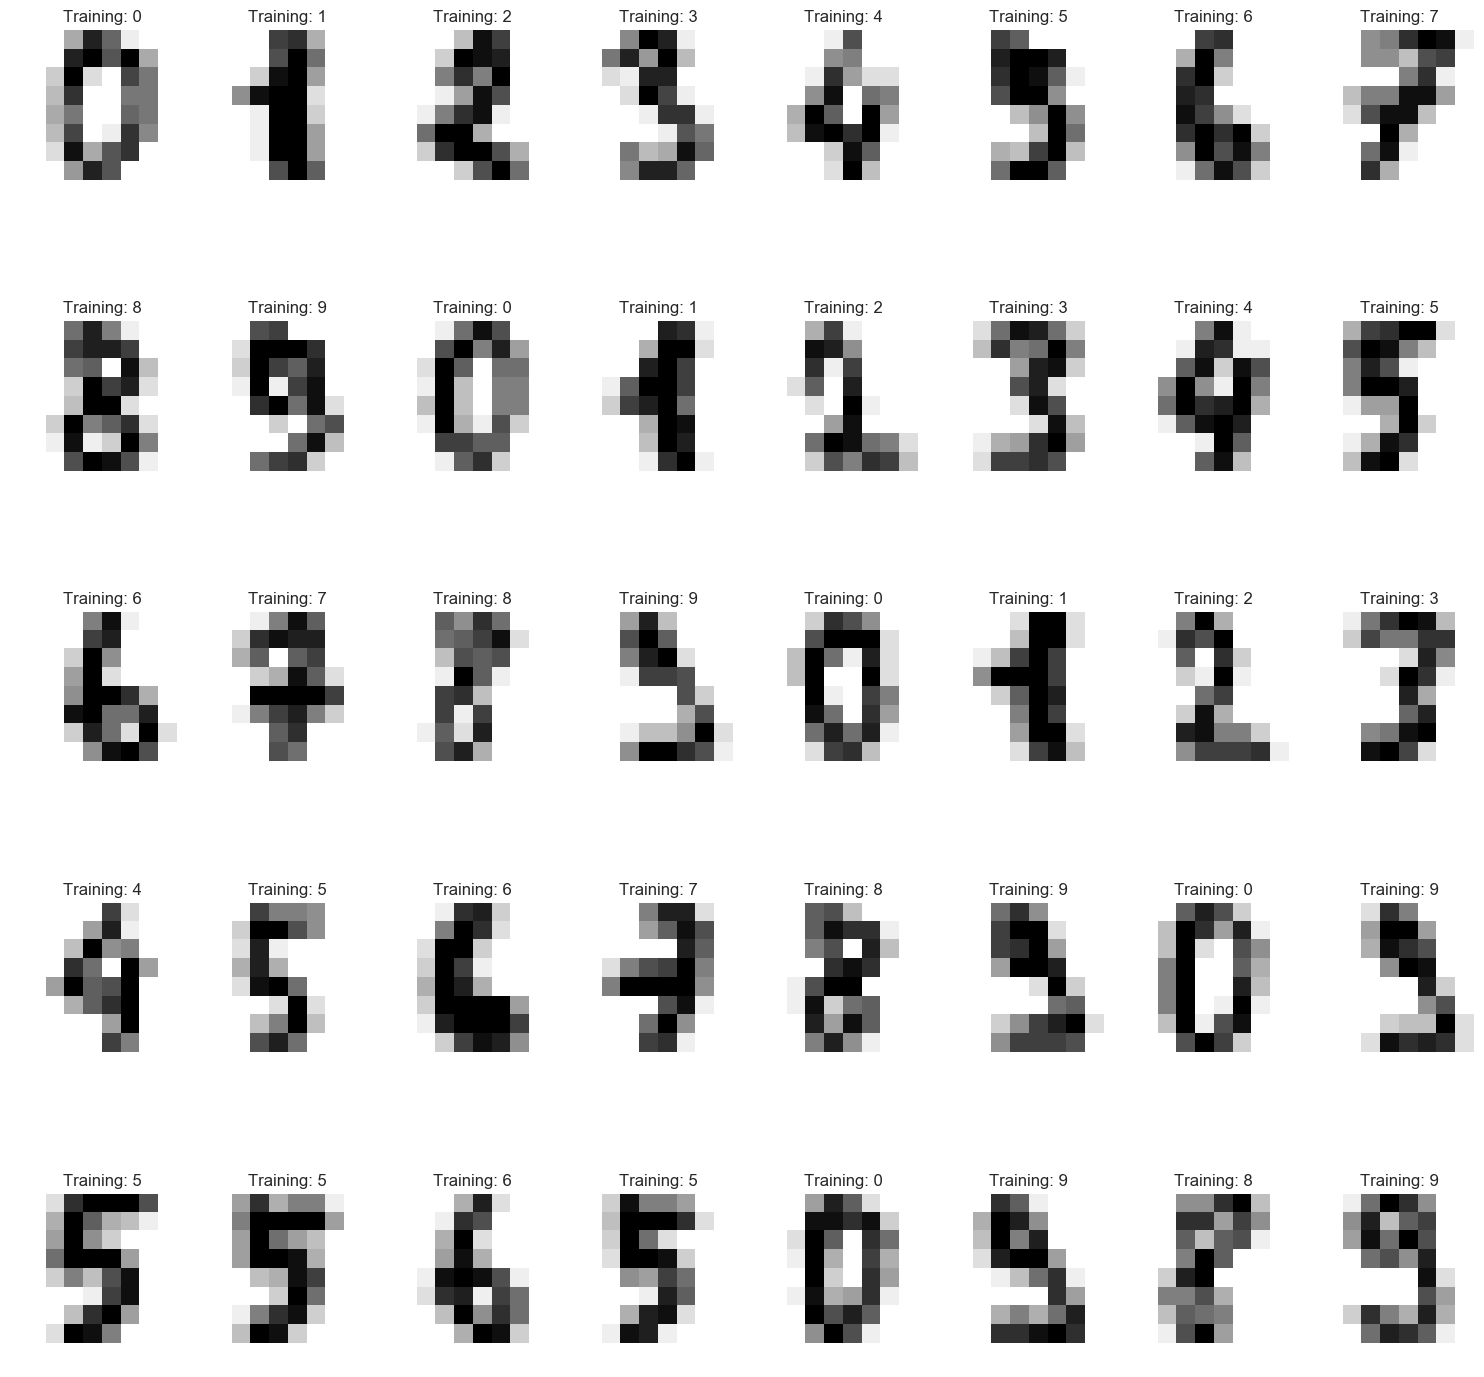

In [36]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
plt.figure(figsize=[15,15])
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:40]):
    plt.subplot(5, 8, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

plt.tight_layout()
plt.show()

In [37]:
# How large is the training data? 
n_samples = len(digits.images)
print n_samples

1797


In [38]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

#### This is where we fit the classifier: ###
# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  

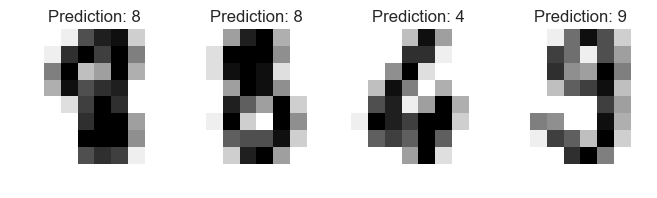

In [39]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)


Classifier comparison

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.



/Users/jkinney/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


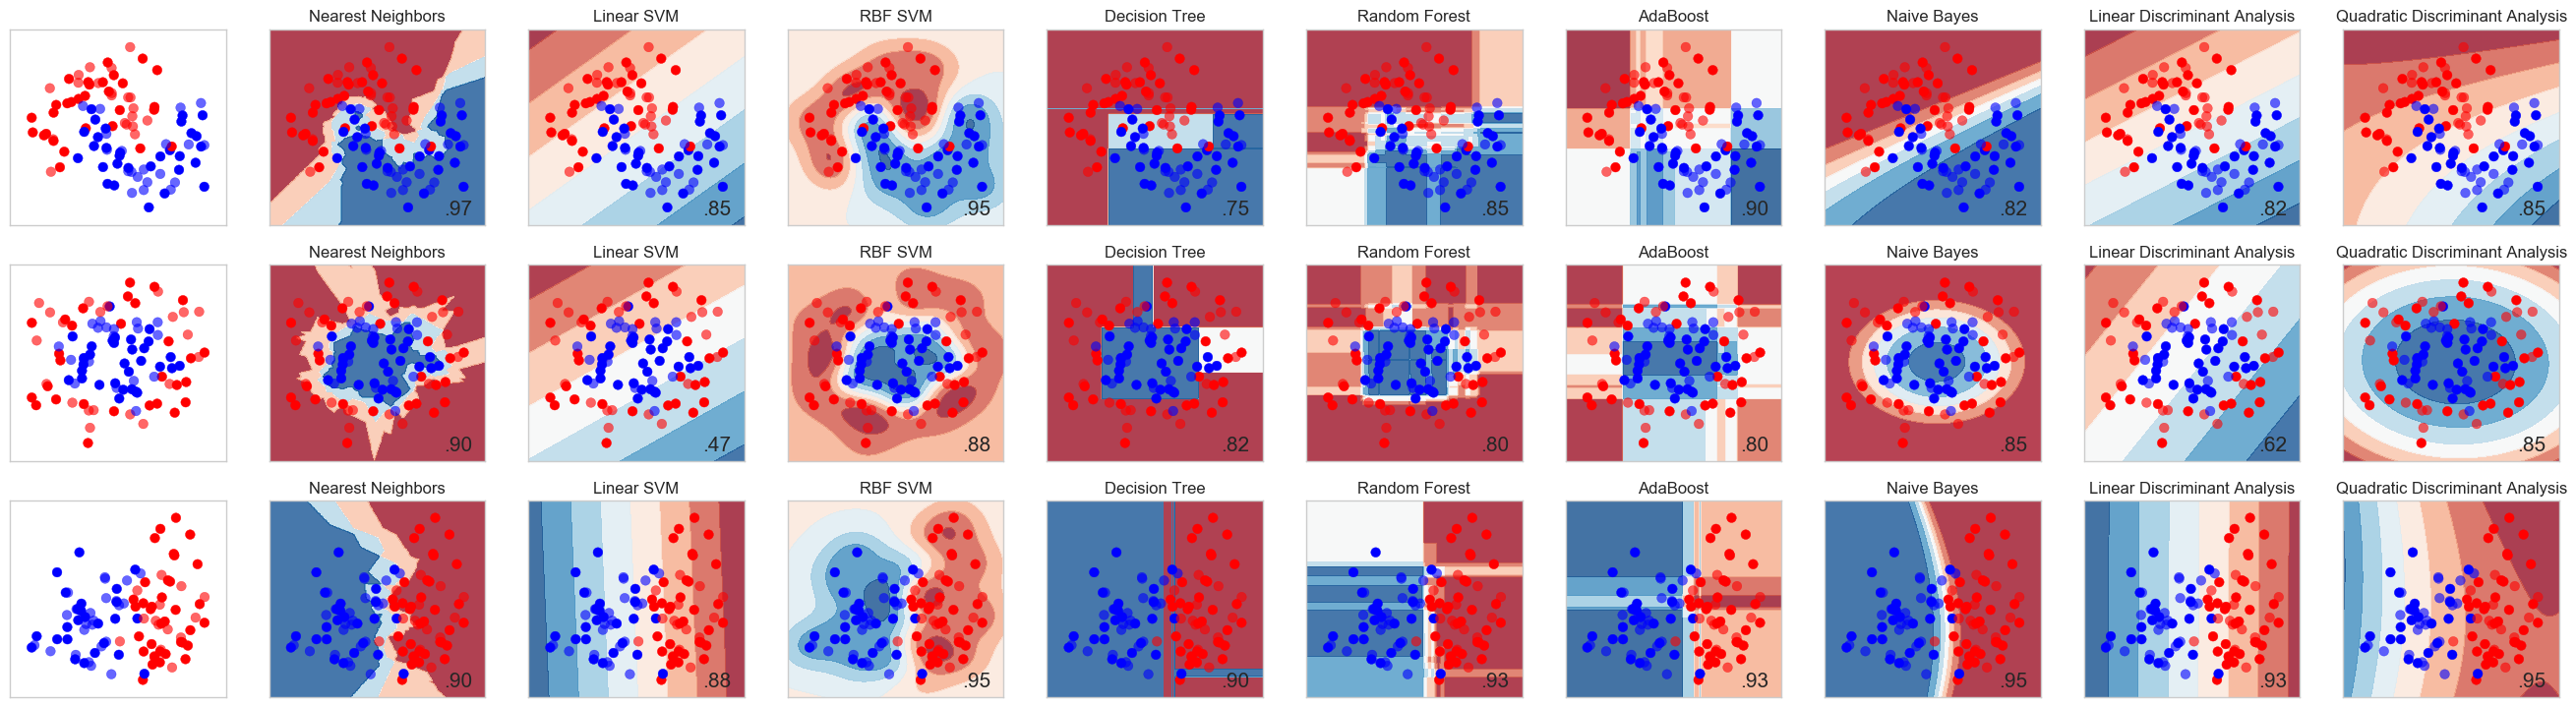

In [40]:
"""
=====================
Classifier comparison
=====================

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.
"""
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

## Scipy

Scipy (https://www.scipy.org/) is the primary scientific python toolkit. There is lots of useful math stuff in here. 

One very useful thing is the large set of statistical functions provided by scipy. Here is a list: https://docs.scipy.org/doc/scipy/reference/stats.html

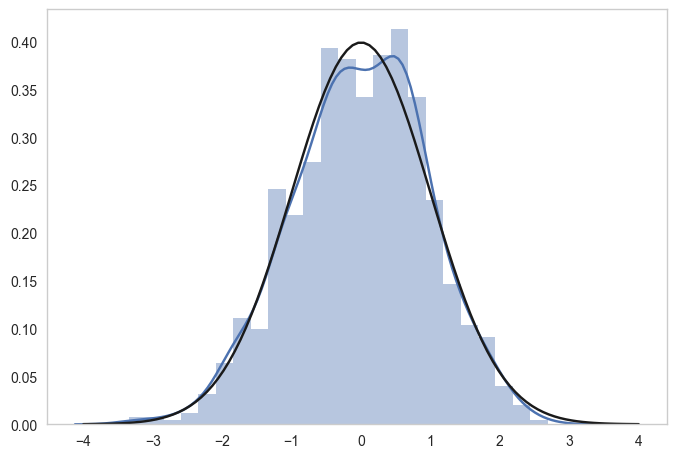

In [41]:
from scipy import stats

# Define distribution
norm = stats.norm()

# Draw random numbers from a normal distribution
xs = norm.rvs(size=1000)
sns.distplot(xs)

# Draw the true distribution
x_grid = np.linspace(-4,4,100)
plt.plot(x_grid,norm.pdf(x_grid),'k')

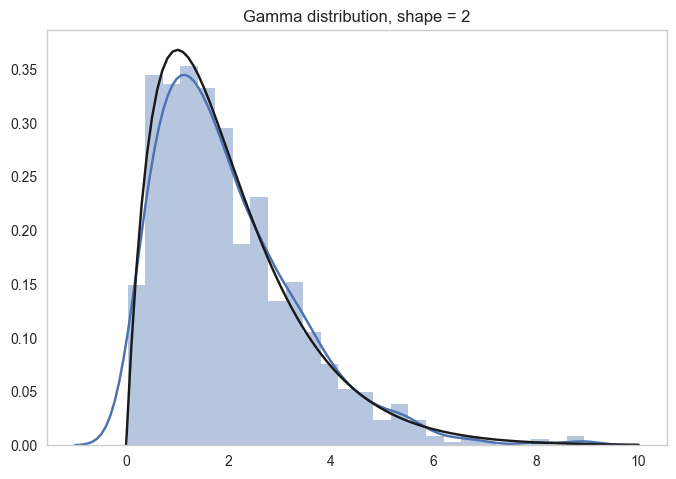

In [43]:
# Define distribution
shape_param = 2.0
gamma = stats.gamma(shape_param)

# Draw random numbers from a normal distribution
xs = gamma.rvs(size=1000)
sns.distplot(xs)

# Draw the true distribution
x_grid = np.linspace(0,10,100)
plt.plot(x_grid, gamma.pdf(x_grid),'k')

plt.title('Gamma distribution, shape = %d'%shape_param)

$$ I(n,x) = \int_1^\infty dt \frac{e^{-xt}}{t^n} $$

In [45]:
from scipy import integrate

# Numerical ntegration 
def integrand(t, n, x):
    return np.exp(-x*t) / t**n
n = 5
x = 4
I = integrate.quad(integrand, 1, np.inf, args=(n, x))
print 'integral value: I = %f'%I[0]
print 'absolute error <= %e'%I[1]

integral value: I = 0.002156
absolute error <= 1.727266e-11


We want to solve the second-order Oridnary Differential Equation (ODE),

$$ \theta''(t) + b*\theta'(t) + c*\sin(\theta(t)) = 0 $$

We do this by changing to a systems of multiple first-order ODEs:

$$ \theta'(t) = \omega(t) $$
$$ \omega'(t) = -b*\omega(t) - c*\sin(\theta(t)) $$

Systems of first-order ODEs like this can readilty be solved using scipy.integrate.odeint

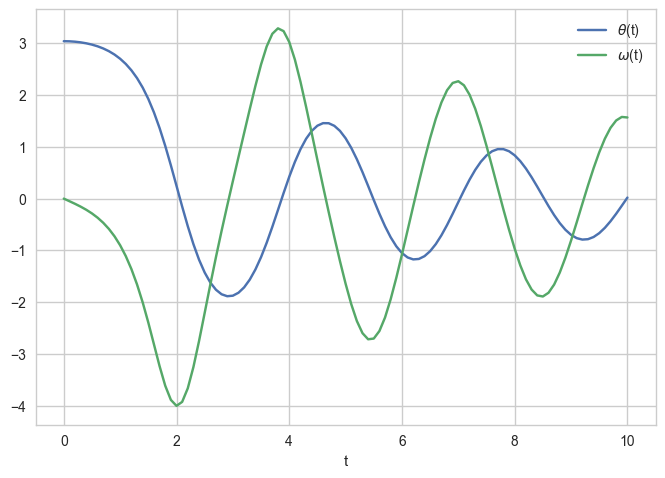

In [46]:
from scipy.integrate import odeint

def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0

y0 = [np.pi - 0.1, 0.0]

t = np.linspace(0, 10, 101)
sol = odeint(pend, y0, t, args=(b, c))

plt.plot(t, sol[:, 0], 'b', label=r'$\theta$(t)')
plt.plot(t, sol[:, 1], 'g', label=r'$\omega$(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()